In [150]:
import tensorflow as tf
import tensorflow_probability as tfp
import sys
sys.path.append('../Utility_Scripts/')
import matplotlib.pyplot as plt
from synthetic_data_generator import MLR,meal_income,two_feature_uncertainty
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential

from tensorflow.keras.layers import Dense
import pandas as pd
import numpy as np

try:
    plt.style.use('rossidata')
except:
    sns.set_style("white")
from collections import Counter
from scipy.stats import entropy,pearsonr
from math import log2
import seaborn as sns
from sklearn.metrics import mean_squared_error,mutual_info_score


# Consider a bag of skittles

In [195]:
expected_results={'red':0.196,
                  'orange':0.196,
                  'green':0.197,
                  'purple':0.177,
                  'yellow':0.234}

In [199]:
def safe_corr(p,q):
    if min(np.std(q),np.std(q))==0:
        return 0
    else:
        np.corrcoef(p,q)[0,1]
        
def cross_entropy(p, q):
    return entropy(p,q,base=2)+entropy(p,base=2)

def sampling_sim(expected_results,n,algo='kl_divergence'):
    
    sample=np.random.choice(list(expected_results.keys()),size=n,p=list(expected_results.values()))
    observed={key : 0 for key in expected_results.keys()}
    counter_dict=Counter(sample)
    for key in counter_dict.keys():
        observed[key]=counter_dict[key]/len(sample)

    comparison_df=pd.DataFrame([observed,expected_results])
    
    ## computing 
    if algo=='kl_divergence':
        #measuring the likelihood that samples represented by the empirical distribution p were generated by a fixed distribution q
        return entropy(comparison_df.iloc[0],comparison_df.iloc[1],base=2)
    elif algo=='cross_entropy':
        return cross_entropy(comparison_df.iloc[0],comparison_df.iloc[1])
    
    elif algo=='mse':
        return mean_squared_error(comparison_df.iloc[0],comparison_df.iloc[1])
    elif algo=='correlation':
        return pearsonr(comparison_df.iloc[0],comparison_df.iloc[1])[0]
    else:
        print('algo not recognized')


/Users/nicholas.rossi/miniconda3/envs/py36/lib/python3.6/site-packages/scipy/stats/stats.py:3845: PearsonRConstantInputWarning: An input array is constant; the correlation coefficent is not defined.
  warnings.warn(PearsonRConstantInputWarning())


Text(0.5, 0.98, 'Comparing Loss Functions \n Sampled vs True Distributions')

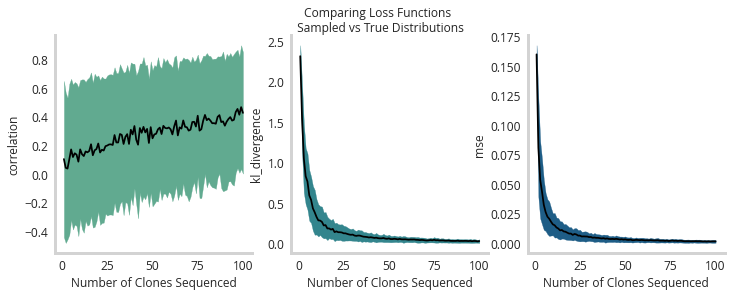

In [206]:
fig,ax=plt.subplots(1,3,figsize=(12,4))
colors=sns.color_palette("crest", 3)

for z,algo in enumerate(['correlation','kl_divergence','mse']):
    num_sims=200
    num_samples=100
    data=np.zeros((num_sims,num_samples))
    for i in range(num_sims):
        for j in range(num_samples):
            data[i,j]=sampling_sim(expected_results,j+1,algo=algo)


    x = np.arange(num_samples)+1
    y = np.nanmean(data,axis=0)
    error = np.nanstd(data,axis=0)

    ax[z].plot(x, y, 'k-',label='Simulated')
    ax[z].fill_between(x, y-error, y+error,color=colors[z])
    ax[z].set_xlabel('Number of Clones Sequenced')
    ax[z].set_ylabel(f'{algo}')
    ax[z].set_title(f'{algo}')
plt.suptitle('Comparing Loss Functions \n Sampled vs True Distributions')

In [20]:
np.random.choice(list(True_distribution.keys()),size=5,p=list(True_distribution.values()))

array(['red', 'red', 'purple', 'orange', 'green'], dtype='<U6')

In [19]:
True_distribution.keys()

dict_keys(['red', 'orange', 'green', 'purple', 'yellow'])

# Examples

In [93]:
expected_results={'red':0.25,
                  'orange':0.25,
                  'yellow':0.25,
                  'green':0.25}


observed_results={'red':1,
                  'orange':0,
                  'yellow':0,
                  'green':0}




In [184]:
def loss_summary(expected_results,observed_results):
    expected_data=pd.DataFrame({'colors':list(expected_results.keys()),
              'percentages':list(expected_results.values())})
    observed_data=pd.DataFrame({'colors':list(observed_results.keys()),
              'percentages':list(observed_results.values())})
    #sns.color_palette("Spectral", as_cmap=True)
    colors=sns.color_palette("Spectral", 20)[::5]
    fig,ax=plt.subplots(1,3,figsize=(12,4))
    sns.barplot(x='colors',y='percentages',data=expected_data,palette=colors,ax=ax[0])
    ax[0].set_ylim([0,1])

    sns.barplot(x='colors',y='percentages',data=observed_data,palette=colors,ax=ax[1])
    ax[1].set_ylim([0,1])


    comparison_df=pd.DataFrame([observed_results,expected_results])
    metrics={'KL':entropy(comparison_df.iloc[0],comparison_df.iloc[1]),
             'CE':cross_entropy(comparison_df.iloc[0],comparison_df.iloc[1]),
             'CORR':safe_corr(list(comparison_df.iloc[0]),list(comparison_df.iloc[1])),
            'MSE':mean_squared_error(comparison_df.iloc[0],comparison_df.iloc[1])}

    metric_df=pd.DataFrame({'metric_type':list(metrics.keys()),
                  'value':list(metrics.values())})

    sns.barplot(x='metric_type',y='value',data=metric_df,palette=['darkgrey'],ax=ax[2])
    ax[0].set_title('True Distribution')
    ax[1].set_title('Sampled Distribution')
    ax[2].set_title('Loss Functions')



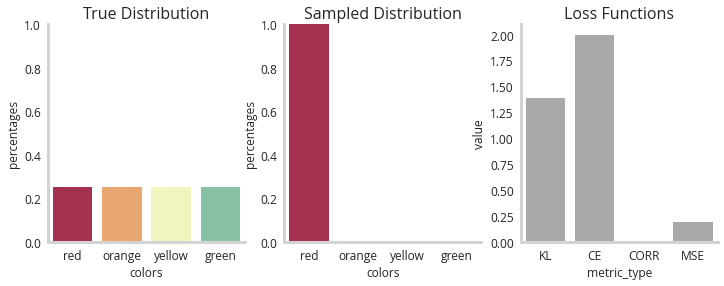

In [186]:
loss_summary(expected_results,observed_results)

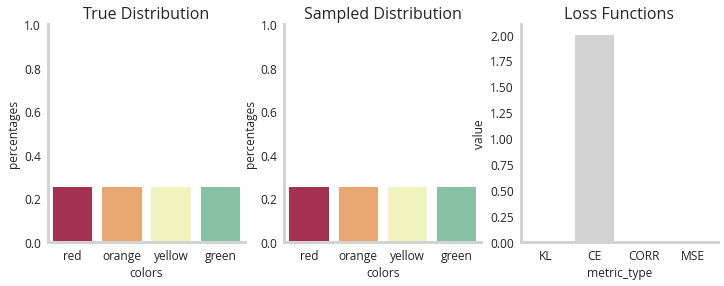

In [174]:
loss_summary(expected_results,expected_results)

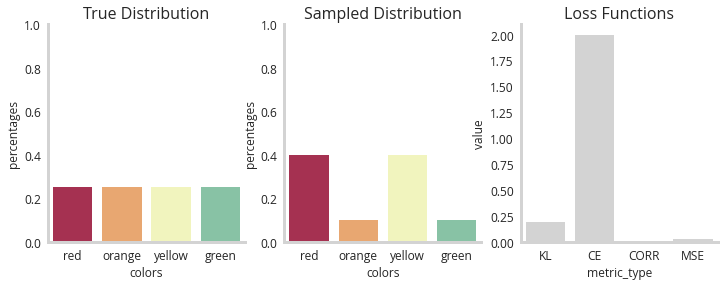

In [183]:
observed_results2={'red':0.4,
                  'orange':0.1,
                  'yellow':0.4,
                  'green':0.1}

loss_summary(expected_results,observed_results2)

In [207]:
cross_entropy([0.5,0.5],[0.5,0.5])

1.0

In [208]:
entropy([0.5,0.5],[0.5,0.5])

0.0

In [163]:
p=[1,0,0,0] # observed
q=[0.25,0.25,0.25,0.25] # fixed

entropy(p,q,base=2)#+entropy(p,base=2)

2.0

In [176]:
np.correlate(q,q)

array([0.25])

In [177]:
np.corrcoef([0.5,0.5],[0.5,0.5])

/Users/nicholas.rossi/miniconda3/envs/py36/lib/python3.6/site-packages/numpy/lib/function_base.py:2559: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[:, None]


array([[nan, nan],
       [nan, nan]])

In [167]:
np.std(q)

0.0

In [ ]:
def safe_corr(p,q):
    if min(np.std(q),np.std(q))==0:
        return 0
    else:
        np.corrcoef(p,q)[0,1]